<a href="https://colab.research.google.com/github/Hugo-Ormond/Projetos/blob/main/ProjetoClusterizacao_HugoOrmond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando o pandas e lendo a base de dados

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DadosTcc/tabelafinaltcc.csv", sep = ';')

Criando uma Cópia para primeira análise

In [ ]:
df1 = df.copy()
df1.head(5)

,CPFCliente,Homem,Sudeste,Assinante,25-50Anos,AnteriorBaseAtiva,SalaoBA,MalaBA,STVBA,OnlineBA,ReservaBA,MiniBA,ReversaBA,OficinaBA,SimplesBA,TMBA,RecenciaBA,FrequenciaBA
0,CPF = 09170621918,1,1,0,1,1,1,0,1,1,1,0,0,0,0,217.70,6,2
1,CPF = 25782383836,1,1,0,1,1,0,0,1,1,1,0,0,0,0,216.81,0,1
2,CPF = 28571895830,1,1,0,1,0,1,0,0,0,1,0,0,0,0,429.00,5,1
3,CPF = 09063158750,0,0,0,1,1,0,0,1,1,1,1,0,0,0,109.75,9,2
4,CPF = 08216421621,1,1,0,1,0,0,0,0,1,1,0,0,0,0,119.90,7,1


In [ ]:
df1.dtypes

CPFCliente            object
Homem                  int64
Sudeste                int64
Assinante              int64
25-50Anos              int64
AnteriorBaseAtiva      int64
SalaoBA                int64
MalaBA                 int64
STVBA                  int64
OnlineBA               int64
ReservaBA              int64
MiniBA                 int64
ReversaBA              int64
OficinaBA              int64
SimplesBA              int64
TMBA                 float64
RecenciaBA             int64
FrequenciaBA           int64
dtype: object

**Análise 1 - Kmeans com todas as variáveis**

Importando MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Usando MinMaxScaler para padronizar entre 0-1 as variáveis TM, PM, Filiais e Frequencia.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler = scaler.fit(df1[['TMBA']])
df1['TMBA'] = scaler.transform(df1[['TMBA']])
scaler = scaler.fit(df1[['RecenciaBA']])
df1['RecenciaBA'] = scaler.transform(df1[['RecenciaBA']])
scaler = scaler.fit(df1[['FrequenciaBA']])
df1['FrequenciaBA'] = scaler.transform(df1[['FrequenciaBA']])

In [ ]:
df1.head(5)

,CPFCliente,Homem,Sudeste,Assinante,25-50Anos,AnteriorBaseAtiva,SalaoBA,MalaBA,STVBA,OnlineBA,ReservaBA,MiniBA,ReversaBA,OficinaBA,SimplesBA,TMBA,RecenciaBA,FrequenciaBA
0,CPF = 09170621918,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0.220545,0.545455,0.5
1,CPF = 25782383836,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0.219643,0.000000,0.0
2,CPF = 28571895830,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0.434606,0.454545,0.0
3,CPF = 09063158750,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0.111184,0.818182,0.5
4,CPF = 08216421621,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0.121467,0.636364,0.0


Método do Cotovelo para análise do número ideal de clusters (de 3 a 20 clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

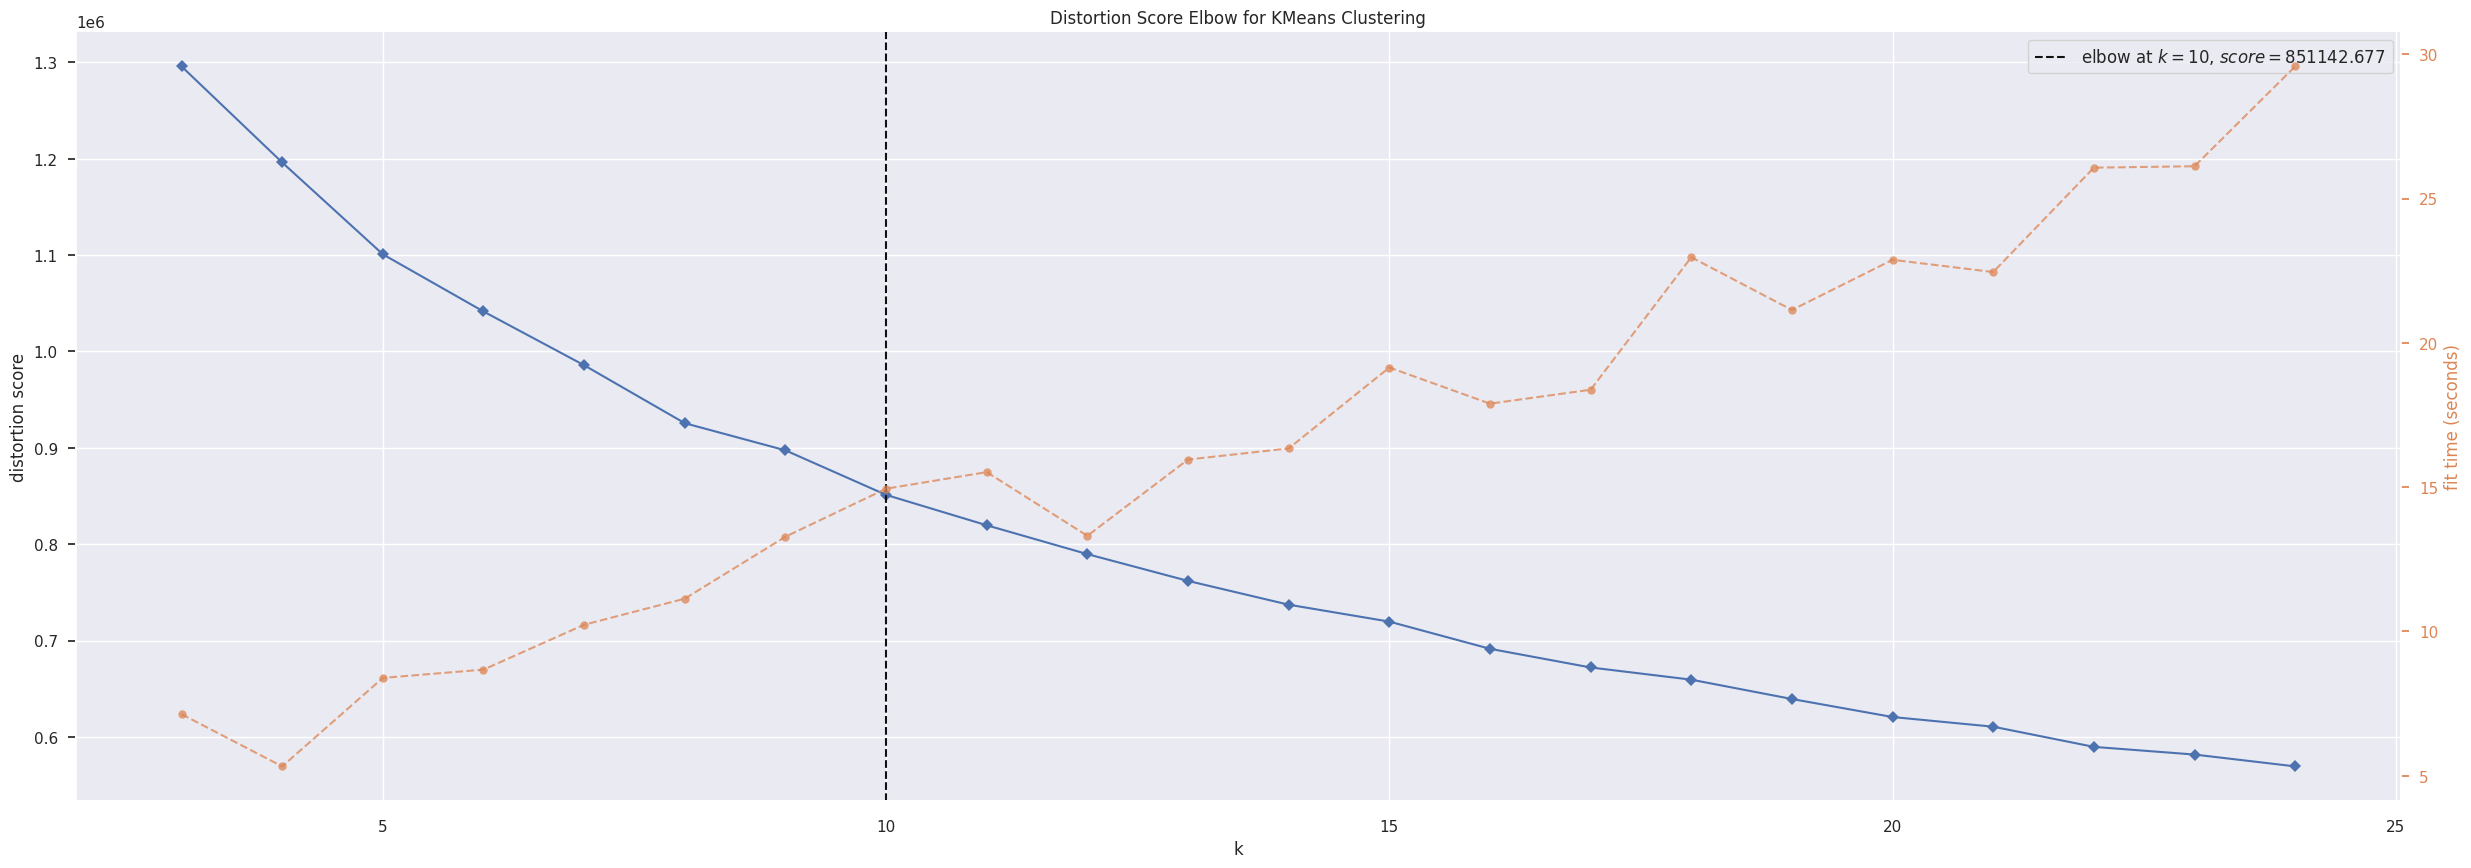

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(3,25))
visualizer.fit(df1.loc[ : , df1.columns != 'CPFCliente'])
visualizer.show()

Treinando o Kmeans com o número de clusters encontrado no método do cotovelo

In [ ]:
kmeans = KMeans(n_clusters=10,random_state=42)
kmeans.fit(df1.loc[ : , df1.columns != 'CPFCliente'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

Analisando os clusters

In [ ]:
import seaborn as sns

In [ ]:
df1cluster = df1.copy()
df1cluster['cluster'] = kmeans.labels_
df1cluster.groupby('cluster').mean()

<ipython-input-11-8161098e274a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1cluster.groupby('cluster').mean()


,Homem,Sudeste,Assinante,25-50Anos,AnteriorBaseAtiva,SalaoBA,MalaBA,STVBA,OnlineBA,ReservaBA,MiniBA,ReversaBA,OficinaBA,SimplesBA,TMBA,RecenciaBA,FrequenciaBA
cluster,,,,,,,,,,,,,,,,,
0,0.184122,0.675038,0.008002,0.936879,0.432523,0.011176,0.003059,0.206540,0.998578,0.084183,0.984030,0.008101,0.009258,0.005439,0.190701,0.488637,0.117224
1,0.999859,0.694783,0.030903,1.000000,1.000000,0.989355,0.024678,0.000000,0.109226,0.961430,0.070504,0.002509,0.069953,0.011700,0.411912,0.461885,0.259590
2,0.000000,1.000000,0.001316,0.934570,0.178282,0.047701,0.004773,0.075225,0.996283,0.980216,0.078798,0.011227,0.008835,0.007712,0.205550,0.509403,0.106293
3,0.413332,1.000000,0.011372,1.000000,0.270652,0.997807,0.007373,0.000000,0.001928,0.975461,0.013328,0.005010,0.030731,0.008422,0.385062,0.482821,0.114317
4,0.466113,0.000000,0.008495,0.771047,0.154258,0.993009,0.012260,0.000161,0.049464,0.976376,0.041199,0.002686,0.025897,0.008575,0.388540,0.469266,0.132746
5,0.513558,0.856192,0.015931,0.000000,0.583472,0.993750,0.014294,0.000000,0.058356,0.956424,0.058688,0.008116,0.061995,0.010738,0.395201,0.461921,0.207347
6,0.565588,0.743898,0.014673,0.837633,0.786564,0.320970,0.007891,0.991544,1.000000,0.964425,0.232621,0.012455,0.047497,0.018950,0.292414,0.445569,0.479717
7,0.213283,0.827097,0.007400,0.793681,0.589032,0.995560,0.012562,0.021803,0.160417,0.238558,0.975465,0.008899,0.032846,0.009374,0.307550,0.457162,0.247182
8,0.630369,0.000000,0.001313,0.946871,0.169879,0.026717,0.002679,0.051448,0.998670,0.971844,0.067378,0.005924,0.018501,0.010734,0.228391,0.490831,0.101517


In [ ]:
df1cluster['cluster'].value_counts()

9    119200
8    111238
3    105789
2    104127
5     96476
6     93775
4     87114
1     85300
0     60487
7     52700
Name: cluster, dtype: int64

In [ ]:
df1cluster['cluster'].value_counts(normalize=True)

9    0.130102
8    0.121412
3    0.115464
2    0.113650
5    0.105299
6    0.102351
4    0.095081
1    0.093101
0    0.066019
7    0.057520
Name: cluster, dtype: float64

<ipython-input-18-7b0d8afd15fa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(df1cluster.groupby('cluster').mean(),annot=True, annot_kws={'size': 10})


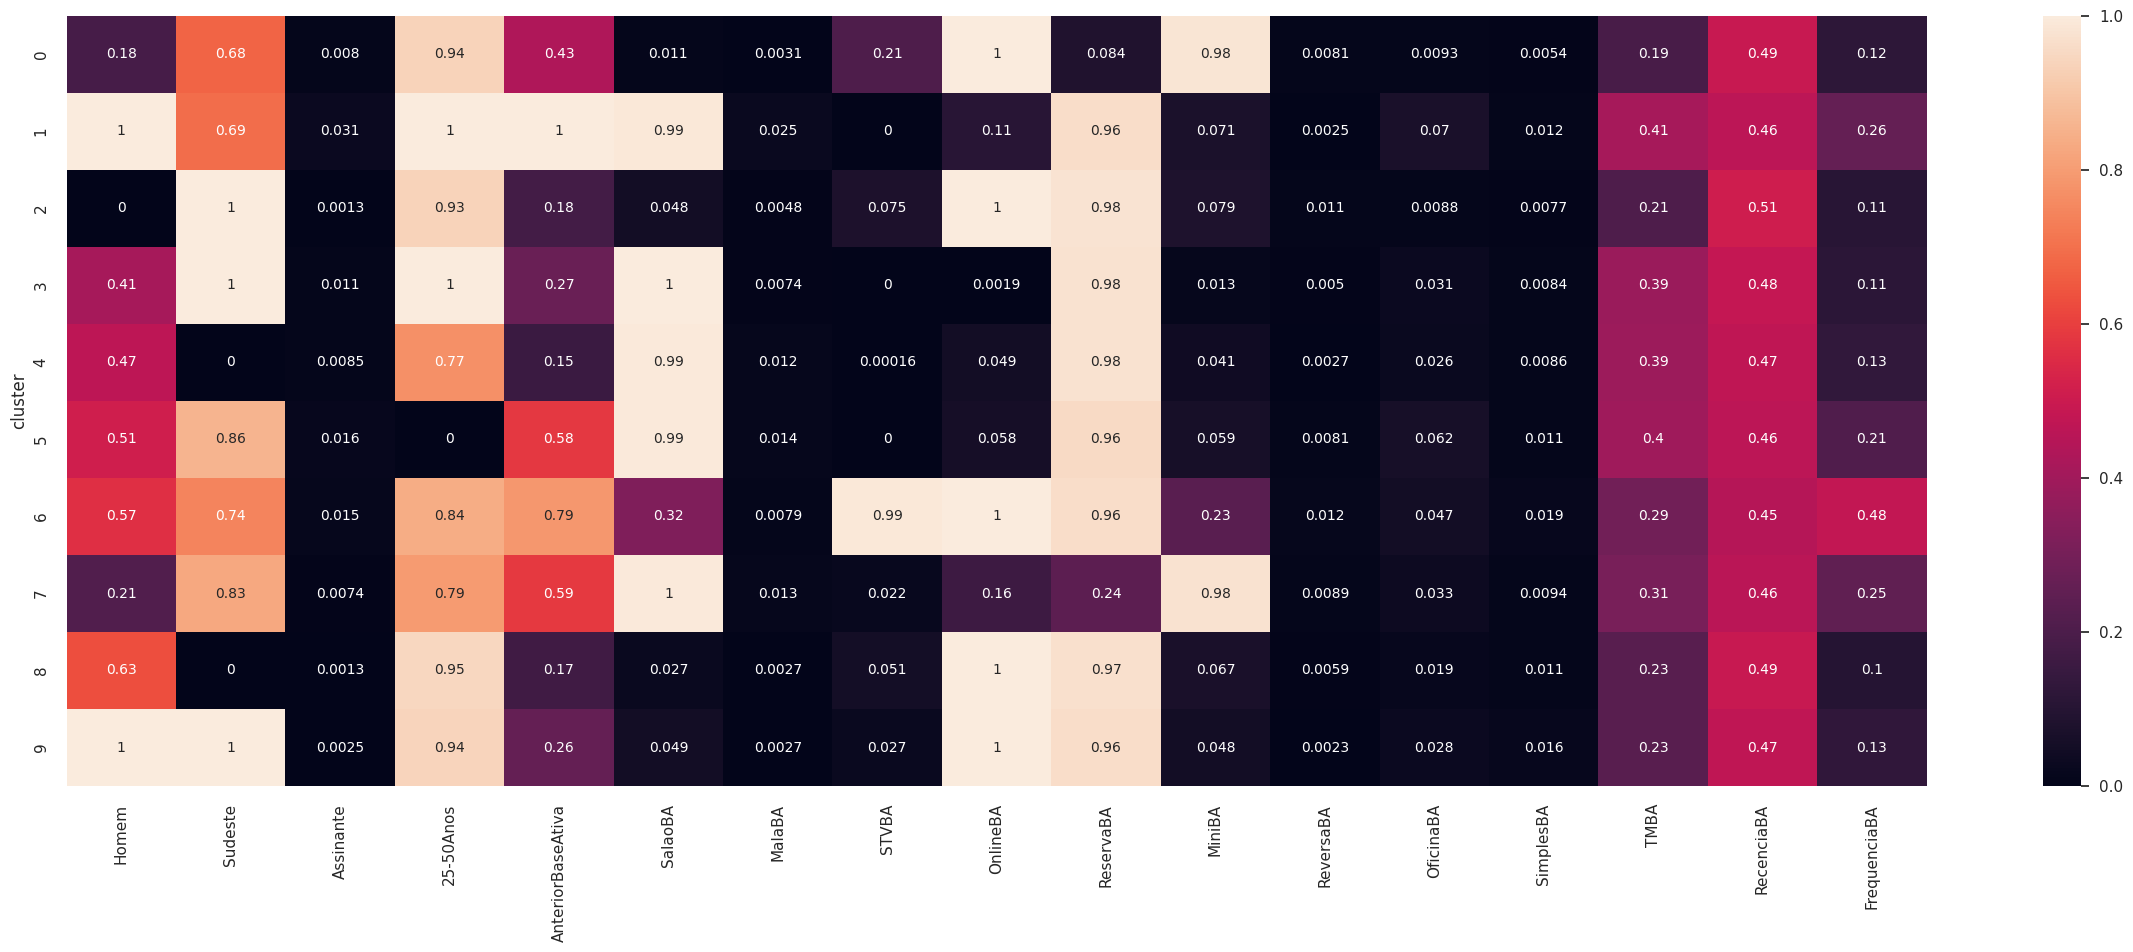

In [ ]:
sns.heatmap(df1cluster.groupby('cluster').mean(),annot=True, annot_kws={'size': 10})
sns.set(rc={"figure.figsize": (30, 10)})

Árvore para ver as features mais importante

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(df1cluster[['Homem','Sudeste','Assinante','25-50Anos','AnteriorBaseAtiva','SalaoBA','MalaBA','STVBA','OnlineBA','ReservaBA','MiniBA','ReversaBA','OficinaBA','SimplesBA','TMBA','RecenciaBA','FrequenciaBA']],df1cluster['cluster'])


DecisionTreeClassifier(random_state=42)

In [ ]:
tree.feature_importances_

array([1.61498895e-01, 1.68082405e-01, 1.14692651e-05, 9.40125802e-02,
       1.11020616e-01, 3.59526513e-02, 5.32443942e-06, 1.25741312e-01,
       1.04389589e-01, 1.01018627e-01, 8.25357029e-02, 1.29995005e-05,
       4.61926481e-05, 2.32661176e-06, 1.26968114e-03, 3.46582353e-04,
       1.40530462e-02])

In [ ]:
import numpy as np

np.round(tree.feature_importances_,4)

array([0.1615, 0.1681, 0.    , 0.094 , 0.111 , 0.036 , 0.    , 0.1257,
       0.1044, 0.101 , 0.0825, 0.    , 0.    , 0.    , 0.0013, 0.0003,
       0.0141])

In [ ]:
top_features = (
    pd.Series(
        tree.feature_importances_,
        index=df1cluster[['Homem','Sudeste','Assinante','25-50Anos','AnteriorBaseAtiva','SalaoBA','MalaBA','STVBA','OnlineBA','ReservaBA','MiniBA','ReversaBA','OficinaBA','SimplesBA','TMBA','RecenciaBA','FrequenciaBA']].columns
    ).sort_values(ascending=False)
)
top_features

Sudeste              0.168082
Homem                0.161499
STVBA                0.125741
AnteriorBaseAtiva    0.111021
OnlineBA             0.104390
ReservaBA            0.101019
25-50Anos            0.094013
MiniBA               0.082536
SalaoBA              0.035953
FrequenciaBA         0.014053
TMBA                 0.001270
RecenciaBA           0.000347
OficinaBA            0.000046
ReversaBA            0.000013
Assinante            0.000011
MalaBA               0.000005
SimplesBA            0.000002
dtype: float64

**Análise 2 - Kmeans removendo variáveis não significativas**



Criando cópia para segunda análise

In [ ]:
df2 = df.copy()
df2cpf = df.copy()
df2 = df2[['Sudeste','Homem','STVBA','AnteriorBaseAtiva','OnlineBA']]
df2cpf = df2cpf[['CPFCliente','Sudeste','Homem','STVBA','AnteriorBaseAtiva','OnlineBA']]

In [ ]:
df2.head()

,Sudeste,Homem,STVBA,AnteriorBaseAtiva,OnlineBA
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,0,0,0
3,0,0,1,1,1
4,1,1,0,0,1


Método do Cotovelo para análise do número ideal de clusters (de 3 a 25 clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

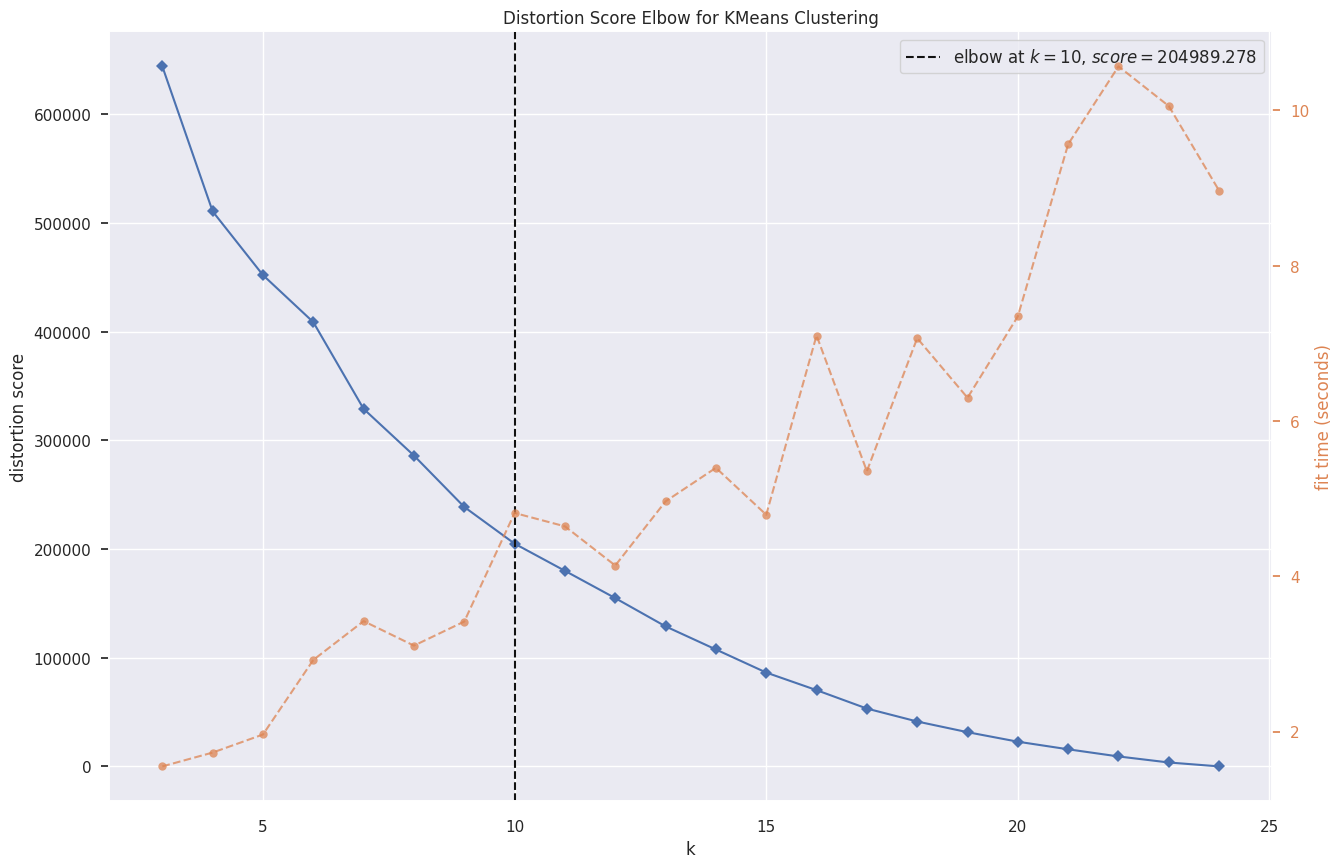

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(3,25))
visualizer.fit(df2)
visualizer.show()

Treinando o Kmeans com o número de clusters encontrado no método do cotovelo

In [ ]:
kmeans = KMeans(n_clusters=10,random_state=42)
kmeans.fit(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

Analisando os clusters

In [ ]:
df2cluster = df2.copy()
df2cpfcluster  = df2cpf.copy()
df2cpfcluster['cluster'] = kmeans.labels_
df2cluster['cluster'] = kmeans.labels_
df2cluster.groupby('cluster').mean()

,Sudeste,Homem,STVBA,AnteriorBaseAtiva,OnlineBA
cluster,,,,,
0,0.657871,0.0,0.000000,0.000000,0.0
1,1.000000,1.0,0.122213,0.000000,1.0
2,1.000000,0.0,0.142673,0.000000,1.0
3,0.706947,1.0,0.000000,1.000000,0.0
4,1.000000,1.0,0.424027,1.000000,1.0
5,0.000000,1.0,0.200333,0.327675,1.0
6,0.771220,0.0,0.467457,1.000000,1.0
7,0.752464,0.0,0.000000,1.000000,0.0
8,0.617730,1.0,0.000000,0.000000,0.0


In [ ]:
df2cluster['cluster'].value_counts()

2    112236
3    108946
8    107738
1    102894
0     96823
5     92436
7     86735
6     85073
4     71887
9     51438
Name: cluster, dtype: int64

In [ ]:
df2cluster['cluster'].value_counts(normalize=True)

2    0.122501
3    0.118910
8    0.117591
1    0.112304
0    0.105678
5    0.100890
7    0.094668
6    0.092854
4    0.078462
9    0.056142
Name: cluster, dtype: float64

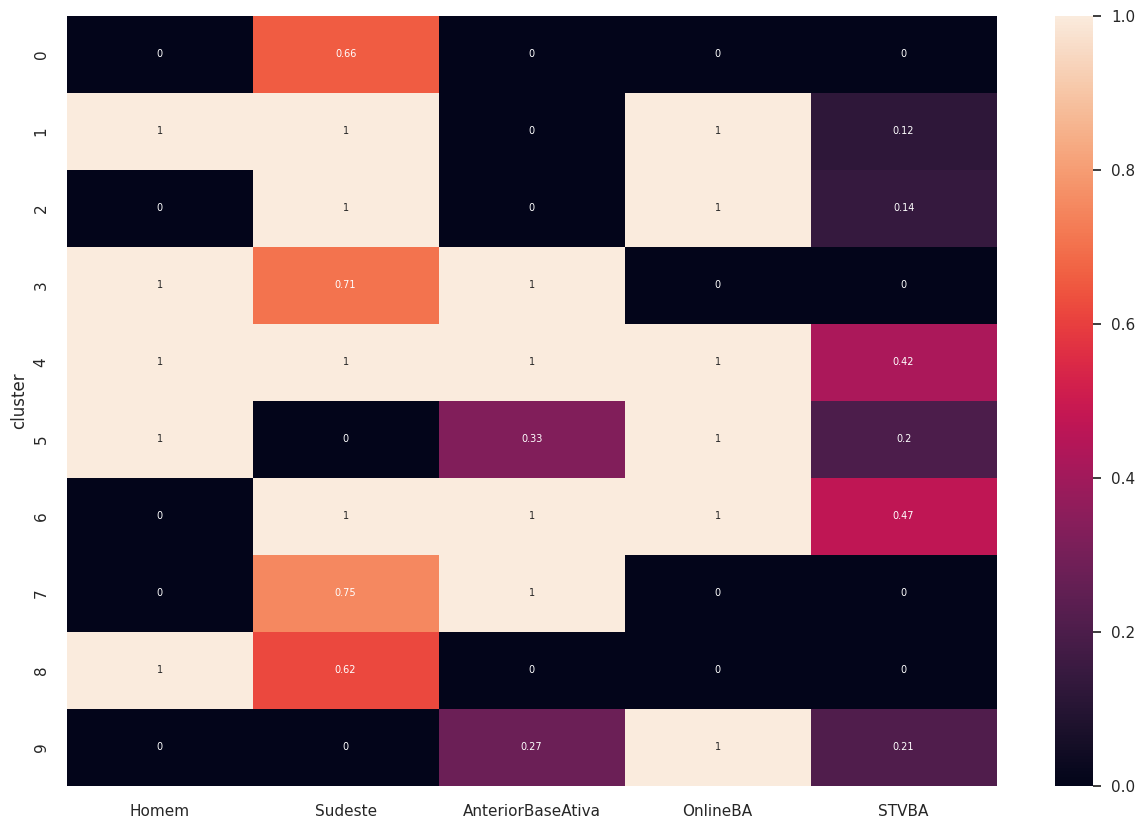

In [ ]:
sns.heatmap(df2cluster.groupby('cluster').mean(),annot=True, annot_kws={'size': 7})
sns.set(rc={"figure.figsize": (15, 10)})

Árvore para ver as features mais importante

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(df2cluster[['Sudeste','Homem','STVBA','AnteriorBaseAtiva','OnlineBA']],df2cluster['cluster'])

DecisionTreeClassifier(random_state=42)

[Text(0.47058823529411764, 0.9, 'OnlineBA <= 0.5\ngini = 0.896\nsamples = 916206\nvalue = [96823, 102894, 112236, 108946, 71887, 92436, 85073\n86735, 107738, 51438]'),
 Text(0.23529411764705882, 0.7, 'AnteriorBaseAtiva <= 0.5\ngini = 0.748\nsamples = 400242\nvalue = [96823, 0, 0, 108946, 0, 0, 0, 86735, 107738, 0]'),
 Text(0.11764705882352941, 0.5, 'Homem <= 0.5\ngini = 0.499\nsamples = 204561\nvalue = [96823, 0, 0, 0, 0, 0, 0, 0, 107738, 0]'),
 Text(0.058823529411764705, 0.3, 'gini = 0.0\nsamples = 96823\nvalue = [96823, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.17647058823529413, 0.3, 'gini = 0.0\nsamples = 107738\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 107738, 0]'),
 Text(0.35294117647058826, 0.5, 'Homem <= 0.5\ngini = 0.494\nsamples = 195681\nvalue = [0, 0, 0, 108946, 0, 0, 0, 86735, 0, 0]'),
 Text(0.29411764705882354, 0.3, 'gini = 0.0\nsamples = 86735\nvalue = [0, 0, 0, 0, 0, 0, 0, 86735, 0, 0]'),
 Text(0.4117647058823529, 0.3, 'gini = 0.0\nsamples = 108946\nvalue = [0, 0, 0, 108946, 0, 0, 

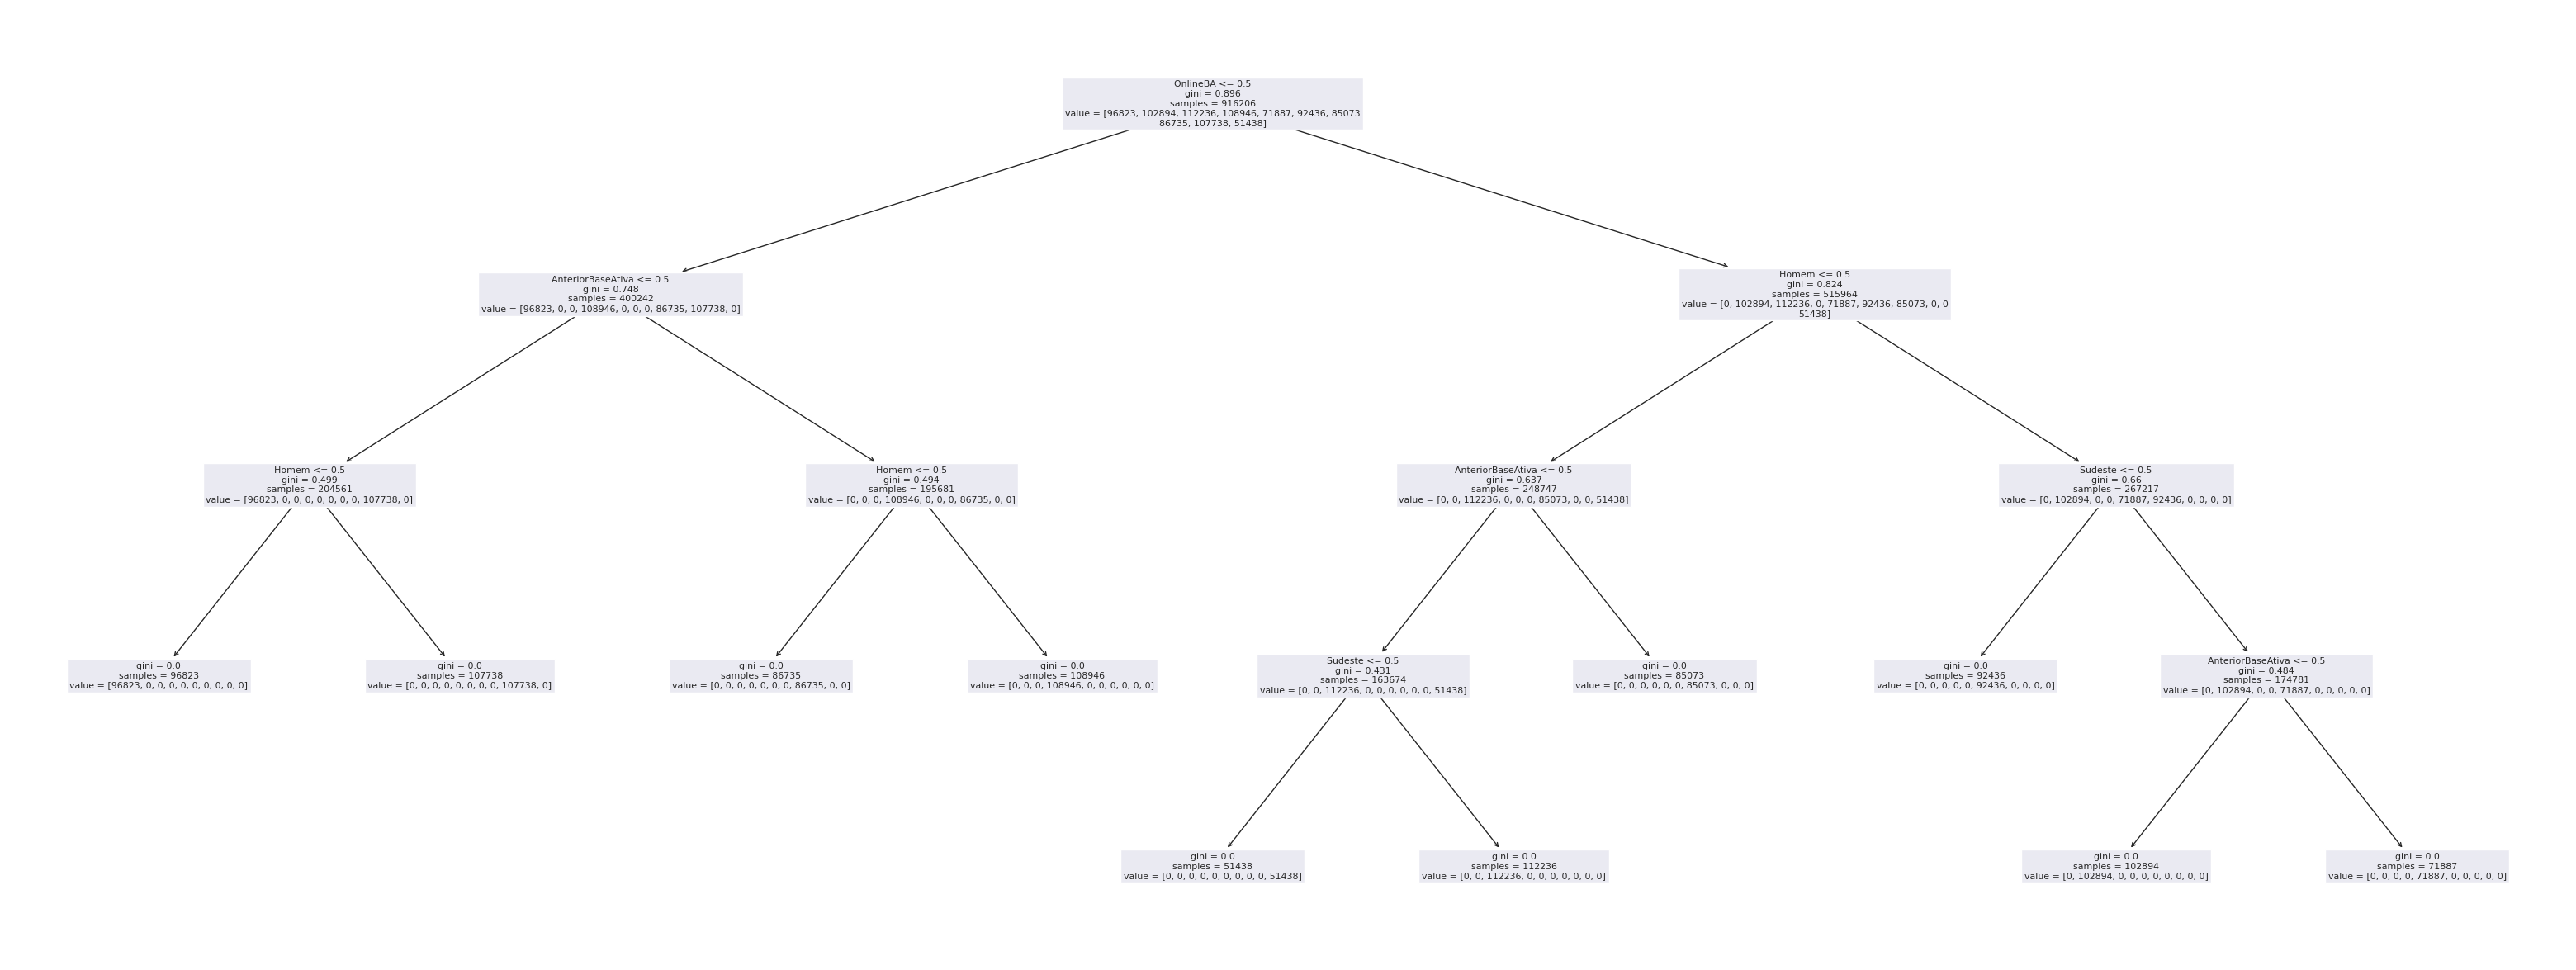

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

features = df2cluster[['Sudeste','Homem','STVBA','AnteriorBaseAtiva','OnlineBA']]
classes = df2cluster['cluster']
nomes = ['Sudeste','Homem','STVBA','AnteriorBaseAtiva','OnlineBA']

plt.figure(figsize=(40, 15))
plot_tree(tree,feature_names=nomes)

In [ ]:
tree.feature_importances_

array([0.19752873, 0.35223495, 0.        , 0.33281258, 0.11742374])

In [ ]:
import numpy as np

np.round(tree.feature_importances_,4)

array([0.1975, 0.3522, 0.    , 0.3328, 0.1174])

In [ ]:
top_features = (
    pd.Series(
        tree.feature_importances_,
        index=df2cluster[['Sudeste','Homem','STVBA','AnteriorBaseAtiva','OnlineBA']].columns
    ).sort_values(ascending=False).head(4)
)
top_features

Homem                0.352235
AnteriorBaseAtiva    0.332813
Sudeste              0.197529
OnlineBA             0.117424
dtype: float64

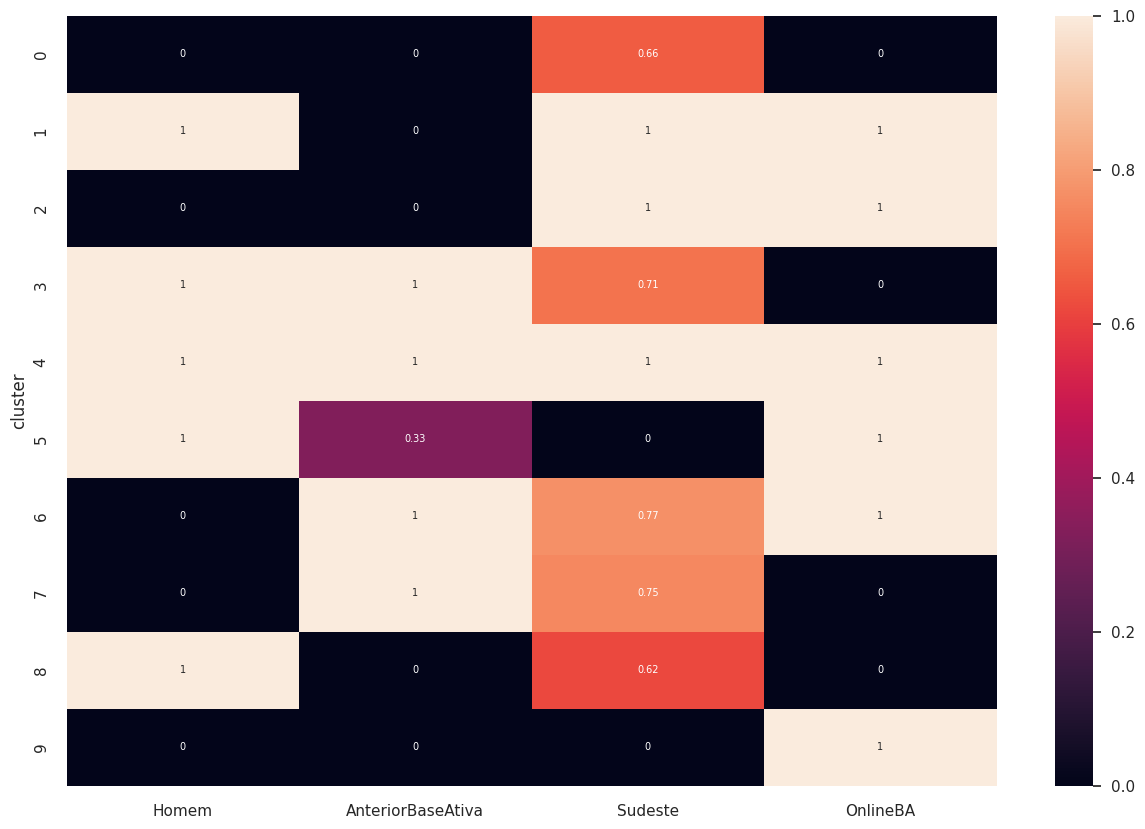

In [ ]:
sns.heatmap(df2cluster.groupby('cluster')[top_features.index].mean(),annot=True, annot_kws={'size': 7})
sns.set(rc={"figure.figsize": (15, 10)})

**Análise 3 - RFM**

In [ ]:
dfrfm = df.copy()
dfrfmcpf = df.copy()
dfrfm = dfrfm[['RecenciaBA','FrequenciaBA','TMBA']]
dfrfmcpf = dfrfmcpf[['CPFCliente','RecenciaBA','FrequenciaBA','TMBA']]

In [ ]:
dfrfm.head()

,RecenciaBA,FrequenciaBA,TMBA
0,6,2,217.70
1,0,1,216.81
2,5,1,429.00
3,9,2,109.75
4,7,1,119.90


In [ ]:
dfrfm = dfrfm.rank(pct=True)

Segmentar com base no rank

In [ ]:
dfrfm

,RecenciaBA,FrequenciaBA,TMBA
0,0.553623,0.816205,0.467283
1,0.042586,0.356491,0.465754
2,0.427109,0.356491,0.771411
3,0.861311,0.816205,0.170244
4,0.720846,0.356491,0.196762
...,...,...,...
916201,0.195821,0.959714,0.442387
916202,0.817307,0.356491,0.238778
916203,0.280140,0.356491,0.771411
916204,0.280140,0.816205,0.467016


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

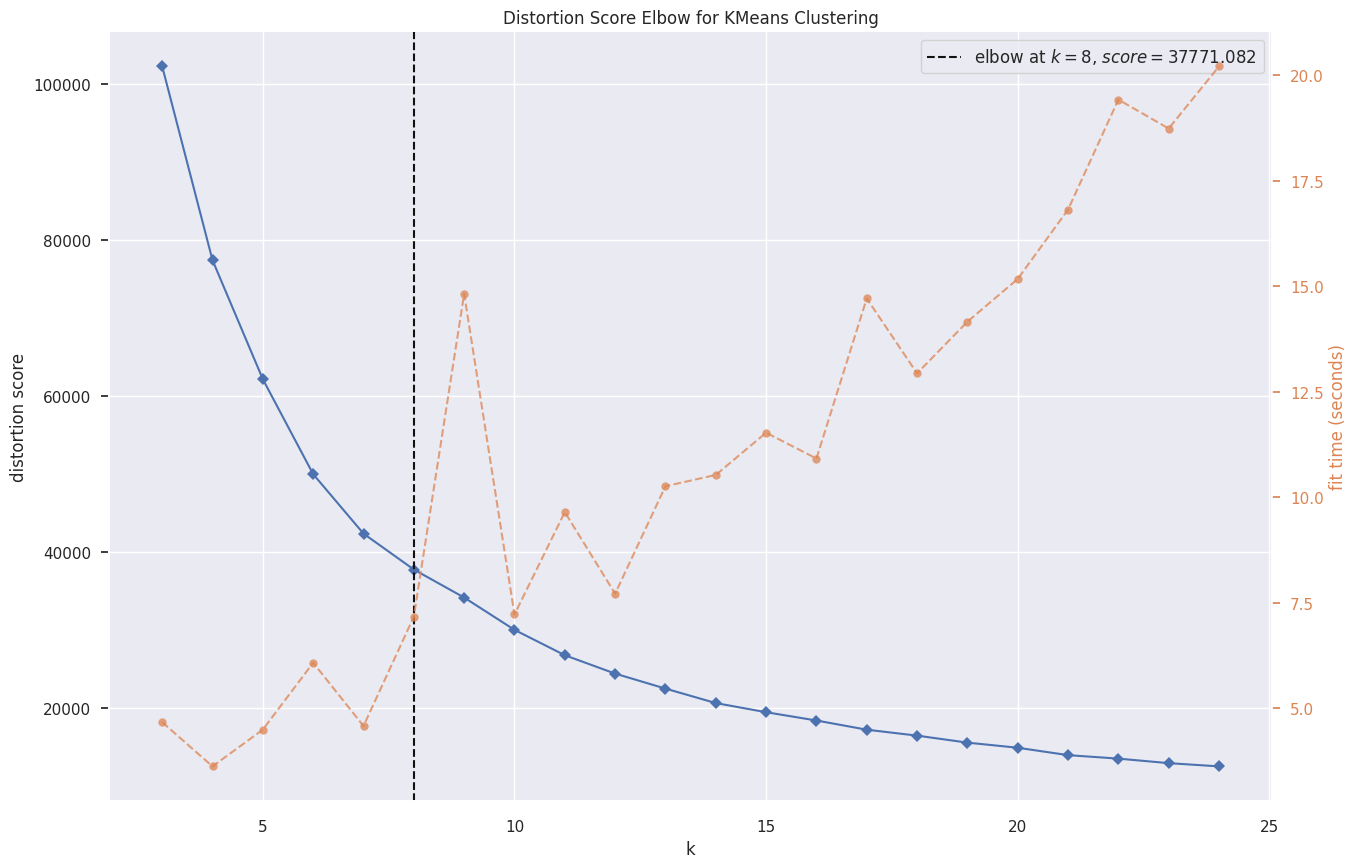

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(3,25))
visualizer.fit(dfrfm)
visualizer.show()

In [ ]:
kmeans2 = KMeans(n_clusters=8,random_state=42)
kmeans2.fit(dfrfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

In [ ]:
dfrfmcluster = dfrfm.copy()
dfrfmclustercpfr = dfrfmcpf.copy()
dfrfmclustercpfr['cluster'] = kmeans2.labels_
dfrfmcluster['cluster'] = kmeans2.labels_
dfrfmcluster.groupby('cluster').mean()

,RecenciaBA,FrequenciaBA,TMBA
cluster,,,
0,0.753300,0.369416,0.160343
1,0.225454,0.356491,0.751053
2,0.721622,0.356491,0.489211
3,0.679284,0.847213,0.660798
4,0.245428,0.356491,0.245397
5,0.197512,0.866785,0.752105
6,0.754067,0.356491,0.825455
7,0.343120,0.854838,0.239855


In [ ]:
dfrfmcluster['cluster'].value_counts()

0    147117
4    130870
2    128781
6    125683
1    124917
5     95922
7     90190
3     72726
Name: cluster, dtype: int64

In [ ]:
dfrfmcluster['cluster'].value_counts(normalize=True)

0    0.160572
4    0.142839
2    0.140559
6    0.137178
1    0.136342
5    0.104695
7    0.098439
3    0.079377
Name: cluster, dtype: float64

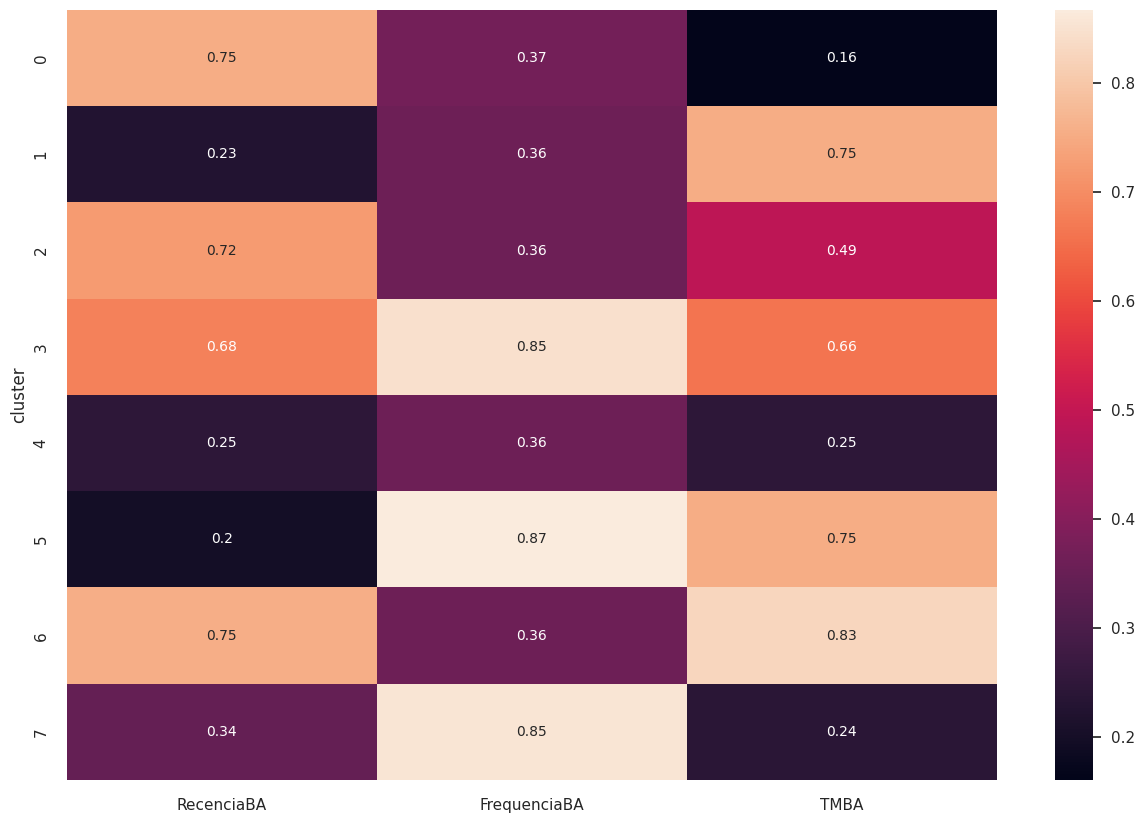

In [ ]:
sns.heatmap(dfrfmcluster.groupby('cluster').mean(),annot=True, annot_kws={'size': 10})
sns.set(rc={"figure.figsize": (15, 10)})

In [ ]:
dfrfmcluster

,RecenciaBA,FrequenciaBA,TMBA,cluster
0,0.553623,0.816205,0.467283,3
1,0.042586,0.356491,0.465754,4
2,0.427109,0.356491,0.771411,1
3,0.861311,0.816205,0.170244,0
4,0.720846,0.356491,0.196762,0
...,...,...,...,...
916201,0.195821,0.959714,0.442387,7
916202,0.817307,0.356491,0.238778,0
916203,0.280140,0.356491,0.771411,1
916204,0.280140,0.816205,0.467016,7


In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(dfrfmcluster[['RecenciaBA','FrequenciaBA','TMBA']],dfrfmcluster['cluster'])

DecisionTreeClassifier(random_state=42)

In [ ]:
top_features = (
    pd.Series(
        tree.feature_importances_,
        index=dfrfmcluster[['RecenciaBA','FrequenciaBA','TMBA']].columns
    ).sort_values(ascending=False)
)
top_features

TMBA            0.419438
FrequenciaBA    0.400859
RecenciaBA      0.179703
dtype: float64

Identificar dentro de cada um ds clusters o perfil de cada cliente com base nesses grupos.

In [ ]:
df_cluster = (
    df2cpfcluster.merge(dfrfmclustercpfr,on='CPFCliente',how='inner')
    .rename(columns={
      'cluster_x': 'clustercategorias',
      'cluster_y': 'clusterrfm'
    })
    .filter(['CPFCliente','clustercategorias','clusterrfm'])
)

In [ ]:
df_cluster

,CPFCliente,clustercategorias,clusterrfm
0,CPF = 09170621918,4,3
1,CPF = 25782383836,4,4
2,CPF = 28571895830,8,1
3,CPF = 09063158750,6,0
4,CPF = 08216421621,1,0
...,...,...,...
916201,CPF = 17390558881,2,7
916202,CPF = 32923478827,1,0
916203,CPF = 04731128927,7,1
916204,CPF = 98778579520,2,7


In [ ]:
df_cluster.query('clustercategorias==0').value_counts('clusterrfm', normalize=True)

clusterrfm
6    0.208731
1    0.198837
2    0.190523
4    0.142714
0    0.095132
5    0.072194
3    0.053861
7    0.038007
dtype: float64

In [ ]:
pd.crosstab(df_cluster['clustercategorias'],df_cluster['clusterrfm'],normalize = 'index').round(2)

clusterrfm,0,1,2,3,4,5,6,7
clustercategorias,,,,,,,,
0,0.10,0.20,0.19,0.05,0.14,0.07,0.21,0.04
1,0.22,0.10,0.13,0.06,0.21,0.08,0.06,0.14
2,0.29,0.07,0.15,0.05,0.19,0.05,0.06,0.14
3,0.08,0.18,0.12,0.10,0.09,0.17,0.22,0.05
4,0.15,0.09,0.11,0.12,0.11,0.17,0.08,0.17
5,0.19,0.11,0.13,0.08,0.18,0.10,0.08,0.12
6,0.20,0.06,0.13,0.13,0.10,0.12,0.08,0.18
7,0.09,0.14,0.15,0.11,0.10,0.14,0.20,0.06
8,0.06,0.27,0.14,0.05,0.11,0.10,0.25,0.02


In [ ]:
pd.crosstab(df_cluster['clusterrfm'],df_cluster['clustercategorias'],normalize = 'index').round(2)

clustercategorias,0,1,2,3,4,5,6,7,8,9
clusterrfm,,,,,,,,,,
0,0.06,0.15,0.22,0.06,0.07,0.12,0.11,0.05,0.05,0.10
1,0.15,0.08,0.07,0.15,0.05,0.08,0.04,0.10,0.23,0.04
2,0.14,0.11,0.13,0.10,0.06,0.10,0.09,0.10,0.12,0.06
3,0.07,0.08,0.08,0.15,0.12,0.10,0.15,0.13,0.07,0.04
4,0.11,0.16,0.17,0.08,0.06,0.12,0.07,0.07,0.09,0.08
5,0.07,0.08,0.06,0.19,0.13,0.10,0.11,0.13,0.11,0.03
6,0.16,0.05,0.05,0.19,0.05,0.06,0.06,0.14,0.22,0.03
7,0.04,0.16,0.17,0.06,0.13,0.12,0.17,0.06,0.03,0.06


Plotando árvores de decisão

In [ ]:
dfrfmcluster2 = dfrfmcluster.copy()

In [ ]:
dfrfmcluster2

,RecenciaBA,FrequenciaBA,TMBA,cluster
0,0.553623,0.816205,0.467283,3
1,0.042586,0.356491,0.465754,4
2,0.427109,0.356491,0.771411,1
3,0.861311,0.816205,0.170244,0
4,0.720846,0.356491,0.196762,0
...,...,...,...,...
916201,0.195821,0.959714,0.442387,7
916202,0.817307,0.356491,0.238778,0
916203,0.280140,0.356491,0.771411,1
916204,0.280140,0.816205,0.467016,7


In [ ]:
import numpy as np

In [ ]:
 dfrfmcluster2 = dfrfmcluster2.groupby('cluster').mean()


In [ ]:
dfrfmcluster2["cluster"] = dfrfmcluster2.index

In [ ]:
dfrfmcluster2['R'] = np.where(dfrfmcluster2['RecenciaBA'] >= 0.5, 1, 0)
dfrfmcluster2['F'] = np.where(dfrfmcluster2['FrequenciaBA'] >= 0.5, 1, 0)
dfrfmcluster2['M'] = np.where(dfrfmcluster2['TMBA'] >= 0.5, 1, 0)

In [ ]:
dfrfmcluster2

,RecenciaBA,FrequenciaBA,TMBA,R,F,M,cluster
cluster,,,,,,,
0,0.753300,0.369416,0.160343,1,0,0,0
1,0.225454,0.356491,0.751053,0,0,1,1
2,0.721622,0.356491,0.489211,1,0,0,2
3,0.679284,0.847213,0.660798,1,1,1,3
4,0.245428,0.356491,0.245397,0,0,0,4
5,0.197512,0.866785,0.752105,0,1,1,5
6,0.754067,0.356491,0.825455,1,0,1,6
7,0.343120,0.854838,0.239855,0,1,0,7


In [ ]:
tree3 = DecisionTreeClassifier(random_state=42)
tree3.fit(dfrfmcluster2[['R','F','M']],dfrfmcluster2['cluster'])

DecisionTreeClassifier(random_state=42)

[Text(0.5769230769230769, 0.875, 'F <= 0.5\ngini = 0.875\nsamples = 8\nvalue = [1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.3076923076923077, 0.625, 'M <= 0.5\ngini = 0.8\nsamples = 5\nvalue = [1, 1, 1, 0, 1, 0, 1, 0]'),
 Text(0.15384615384615385, 0.375, 'R <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [1, 0, 1, 0, 1, 0, 0, 0]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0, 0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0, 0]'),
 Text(0.46153846153846156, 0.375, 'R <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 0, 0, 0, 1, 0]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1, 0]'),
 Text(0.8461538461538461, 0.625, 'R <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [0, 0, 0, 1, 0, 1, 0, 1]'),
 Text(0.7692307692307693, 0.375, 'M <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 

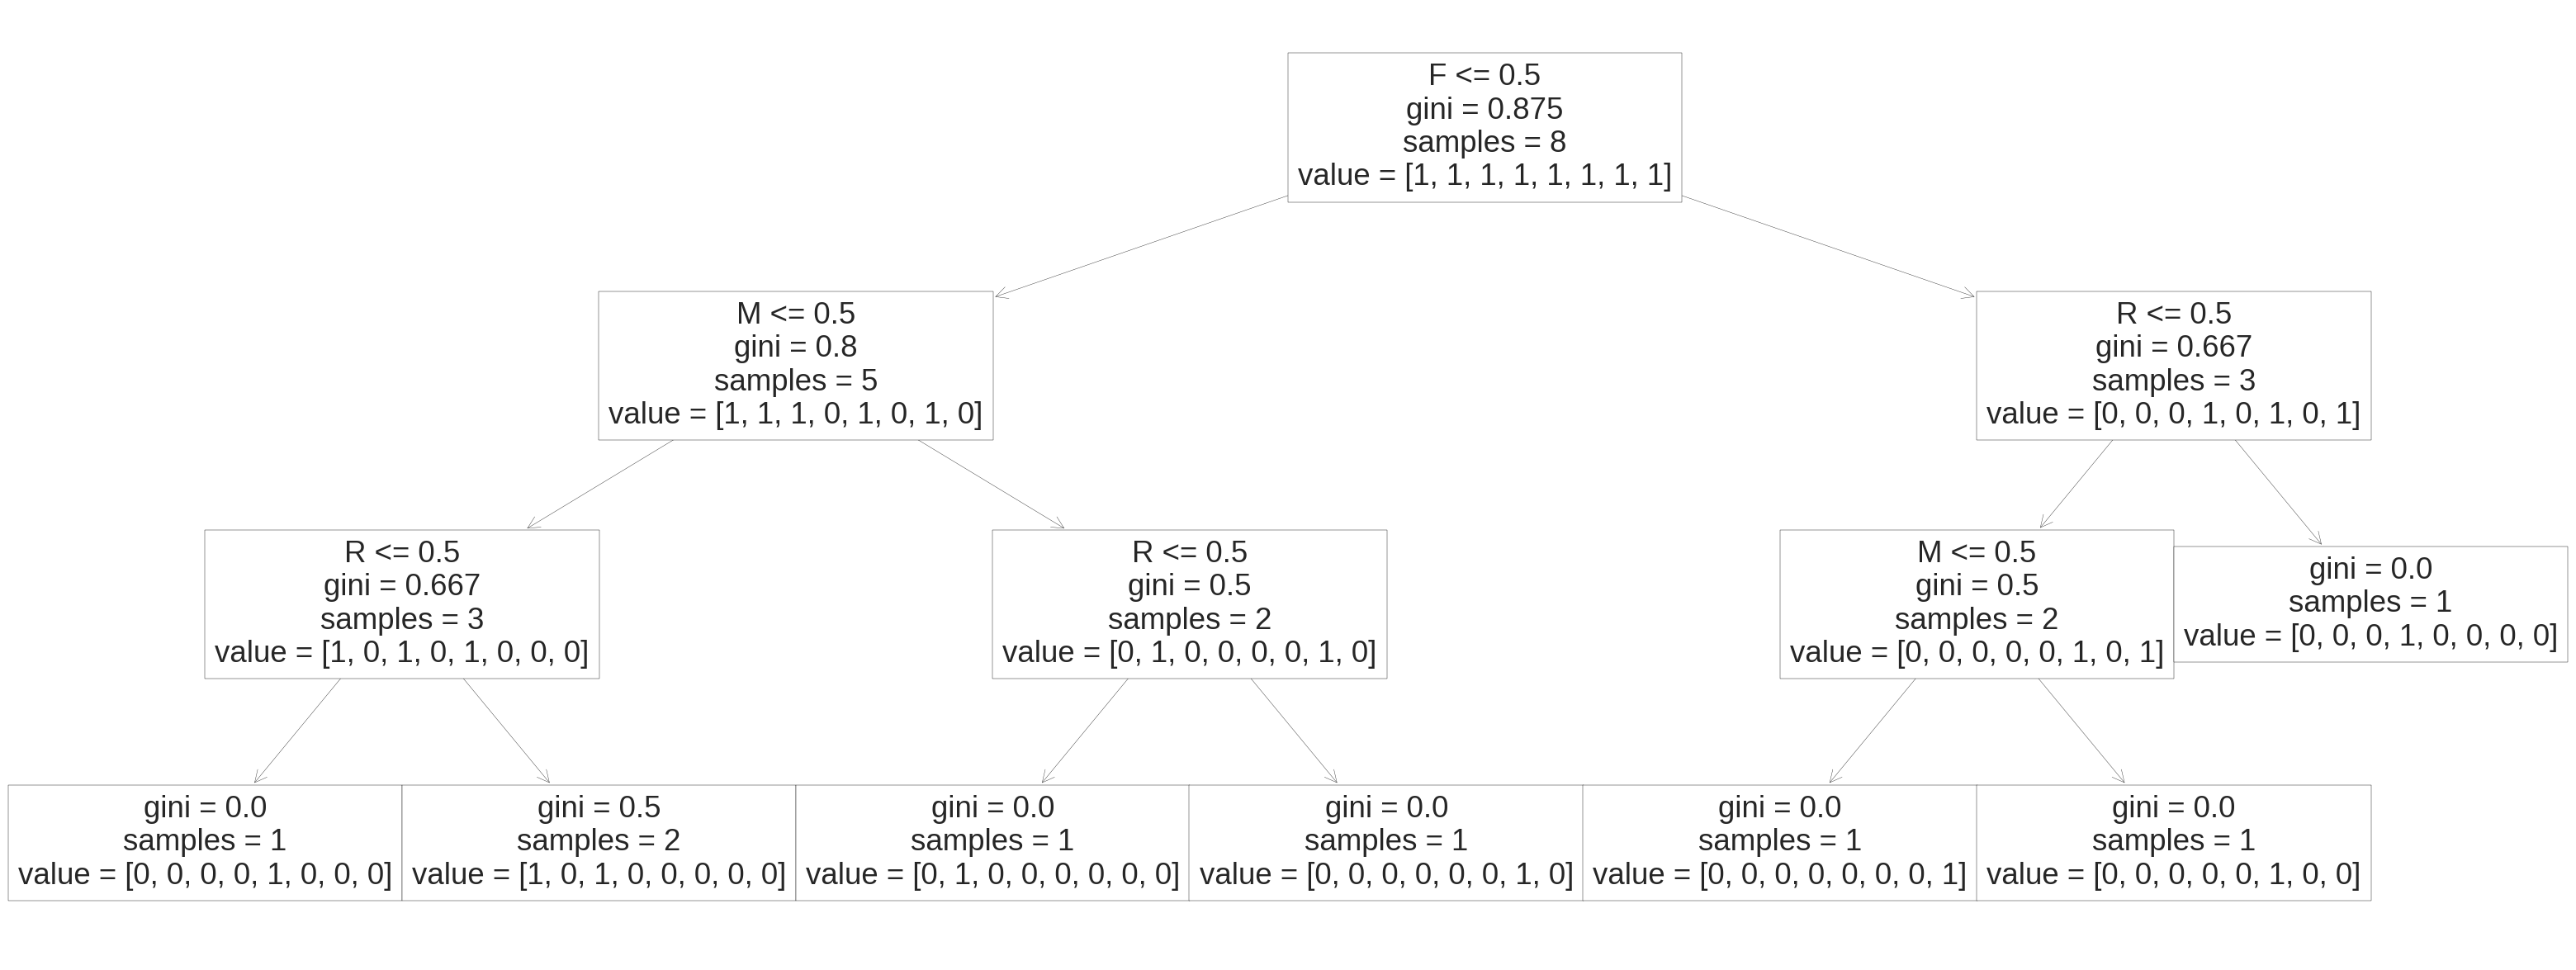

In [ ]:

features = dfrfmcluster2[['R','F','M']]
classes = dfrfmcluster2['cluster']
nomes = ['R','F','M']

plt.figure(figsize=(40, 15))
plot_tree(tree3,feature_names=nomes)